matrix transformation only for perfect file (with path 0)

In [1]:
import numpy as np
import os
import pandas as pd
from scipy.optimize import minimize

# pymatgen libraries
from pymatgen.core.structure import Structure

# import function from .py file
from get_weirdos_ver3_new_cleaned import get_dx_dz_init
# from get_weirdos import get_sum_weirdos_Li
# from modify_dx_dz import create_file_name, change_dx_dz
# from get_weirdos import get_dx1_dx2_dz_init, get_sum_weirdos_Li

In [2]:
from get_weirdos_ver3_new_cleaned import get_dx_dz_init, get_sum_weirdos_Li_var

In [3]:
# # filefile_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_type2.cif"_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"  # Replace with your file path
  # Replace with your file path
file_perfect_poscar_48n24 = "Li6PS5Cl_type2_3iia_new.cif"
file_path_ori_ref_48n24 = f"./perfect_poscar/cif_matrix/ori/{file_perfect_poscar_48n24}"
file_perfect_poscar_24 = "Li6PS5Cl_24_mod_2p27291.cif"
# file_ori_ref_48n24 = "Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"

In [4]:
dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init, dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init, dx_24g_init, dz1_24g_init, dz2_24g_init = get_dx_dz_init(file_path_ori_ref_48n24)

dx1_48h_type1, dx2_48h_type1, dz_48h_type1 = dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init
dx1_48h_type2, dx2_48h_type2, dz_48h_type2 = dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init
dx_24g, dz1_24g, dz2_24g = dx_24g_init, dz1_24g_init, dz2_24g_init

litype = 2
activate_radius = 3
max_mapping_radius = 0.043 # 0.043 ## 0.025 # 0.043 # 0.035
max_mapping_radius_48htype2 = 0.070 # 0.074 ## 0.075 # 0.076 # 0.071 
max_mapping_radius_48htype1_48htype2 = max_mapping_radius_48htype2
var_excel_file = "3iia"
max_mapping_radius_init = max_mapping_radius
max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

In [5]:
delta_radius = 0.001 
n_sample = 140
var_optitype = "varying_radius_type3"

# radius_sumweirdosLi_df= varying_radius_vs_sumweirdosLi(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, max_mapping_radius, max_mapping_radius_48htype2, delta_radius, n_sample, var_optitype)
# plot_varying_radius_vs_sumweirdosLi(radius_sumweirdosLi_df)

In [6]:
col_radius_type1 = "radius_type1"
col_radius_type2 = "radius_type2"
col_radius_type3 = "radius_type3"
col_sumweirdosLi = "sumweirdosLi"

radius_sumweirdosLi_df = pd.DataFrame()
radius_sumweirdosLi_df[col_radius_type1] = None
radius_sumweirdosLi_df[col_radius_type2] = None
radius_sumweirdosLi_df[col_radius_type3] = None
radius_sumweirdosLi_df[col_sumweirdosLi] = None

idx_sumweirdosLi_df = 0
# forward_max_mapping_radius_init = max_mapping_radius
# forward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2
backward_max_mapping_radius_init = max_mapping_radius
backward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2
backward_max_mapping_radius_48htype1_48htype2_init = max_mapping_radius_48htype1_48htype2

# for i in range(int(n_sample/2)):
#     forward_max_mapping_radius = forward_max_mapping_radius_init + (i * delta_radius)
#     # forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_init + (i * delta_radius)
#     forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_48htype2_init

#     sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, forward_max_mapping_radius, forward_max_mapping_radius_48htype2, var_optitype)

#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = forward_max_mapping_radius
#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = forward_max_mapping_radius_48htype2
#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li
    
#     idx_sumweirdosLi_df += 1
#     print(idx_sumweirdosLi_df)

for j in range(int(n_sample/2)):
    # backward_max_mapping_radius = backward_max_mapping_radius_init - (j * delta_radius)
    backward_max_mapping_radius = backward_max_mapping_radius_init
    backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init
    backward_max_mapping_radius_48htype1_48htype2 = backward_max_mapping_radius_48htype1_48htype2_init - (j * delta_radius)
    # backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init

    # sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, var_optitype)
    sum_weirdos_Li = get_sum_weirdos_Li_var(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, backward_max_mapping_radius_48htype1_48htype2, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)


    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = backward_max_mapping_radius
    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = backward_max_mapping_radius_48htype2
    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type3] = backward_max_mapping_radius_48htype1_48htype2
    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

    idx_sumweirdosLi_df += 1
    print(idx_sumweirdosLi_df)


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

1


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

2


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

3


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

4


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

5


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

6


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

7


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

8


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

9


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

10


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

11


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

12


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

13


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

14


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

15


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

16


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

17


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

18


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

19


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

20


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

21


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

22


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

23


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

24


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

25


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

26


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

27


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

28


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

29


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

30


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

31


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

32


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

33


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

34


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

35


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

36


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

37


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

38


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

39


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

40


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

41


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

42


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

43


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

44


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

45


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

46


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

47


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

48


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

49


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

50


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

51


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

52


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

53


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

54


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

55


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

56


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

57


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

58


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

59


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

60


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

61


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

62


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

63


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

64


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

65


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

66


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

67


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

68


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

69


/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/02_En_calc_latticeconstants_analysis/get_weirdos_ver3_new_cleaned.py:3194: SettingWithCopyWarning: 
A value is trying

70


In [7]:
radius_sumweirdosLi_df

,radius_type1,radius_type2,radius_type3,sumweirdosLi
0,0.043,0.07,0.07,8.0
1,0.043,0.07,0.069,8.0
2,0.043,0.07,0.068,9.0
3,0.043,0.07,0.067,10.0
4,0.043,0.07,0.066,10.0
...,...,...,...,...
65,0.043,0.07,0.005,113.0
66,0.043,0.07,0.004,113.0
67,0.043,0.07,0.003,113.0
68,0.043,0.07,0.002,113.0


<Axes: xlabel='radius_type3'>

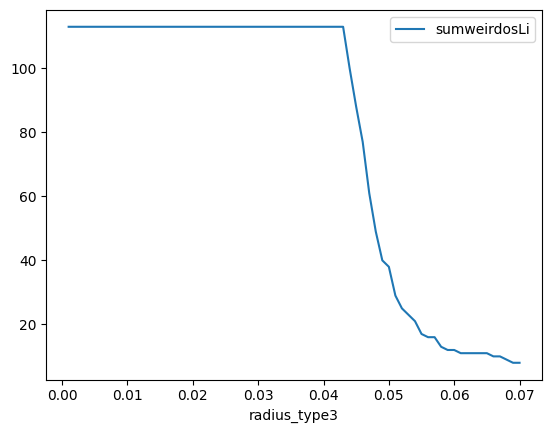

In [8]:
radius_sumweirdosLi_df.plot(x="radius_type3", y="sumweirdosLi")

In [9]:
min_sumweirdos = int(radius_sumweirdosLi_df["sumweirdosLi"].min())

In [10]:
radius_sumweirdosLi_df.to_excel(f'07_varying_radius_type3_{min_sumweirdos}_{var_excel_file}.xlsx', index=False)

In [11]:
# radius_sumweirdosLi_df(radius_sumweirdosLi_df)